### BME 671L SPAM, Fall 2022
## Final Project - EEG Sleep Analysis
#### Authors: Braden Garrison, Jerry Yang, Trevor Alston


### Project Description:

The aim of this project is to construct an algorithm that will take in raw sleep EEG data as an input, clean up and transform the data, and quantify the amount of time spent in each specific cycle of sleep. This is a signficant task because sleep analysis is used to gauge quality of sleep depending on the number of hours spent in certain sleep stages. We plan to clean the raw EEG data using certain filtering techniques explored in lab, and we will identify specific sleep stage signals based on their dominant frequency ranges.

In [43]:
# Set up the environment, import all packages you need in this worksheet.
import numpy as np
import math
from scipy import signal, misc
import scipy.io
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import mne
import csv

In [ ]:
# Import data
# Possible data sources: 
# https://physionet.org/content/capslpdb/1.0.0/
# https://openneuro.org/datasets/ds003768/versions/1.0.9

# Read time seires data: https://stackoverflow.com/questions/51869713/how-to-read-edf-data-in-python-3
# Using mne to read .eeg data: https://mne.tools/stable/auto_tutorials/io/20_reading_eeg_data.html

In [25]:
# Openneuro data (patient 1)
# .eeg file is raw eeg data and .tsv file is tab separated file (i.e., spreadsheet) indicating sleep stage classification
# Data already BPF from 0-250 Hz
# FS = 5000 Hz; Sampling interval = 200 us (microsec)
pat1 = mne.io.read_raw_brainvision(vhdr_fname='sub-01_task-sleep_run-1_eeg.vhdr') # read based on vhdr filename

# Research article showing sleep stage classification from FP1 and FP2 channels - the two forehead channels:
# https://www.frontiersin.org/articles/10.3389/fnins.2014.00263/full

data, times = pat1[0:2:] # Parse data from EEG to just get FP1 and FP2

Extracting parameters from sub-01_task-sleep_run-1_eeg.vhdr...
Setting channel info structure...


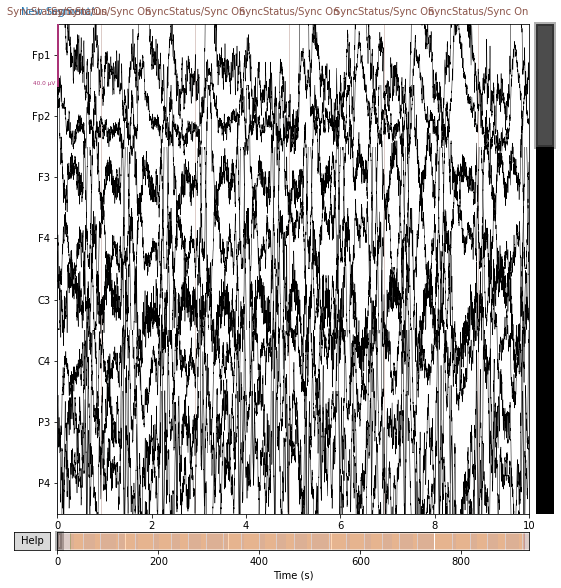

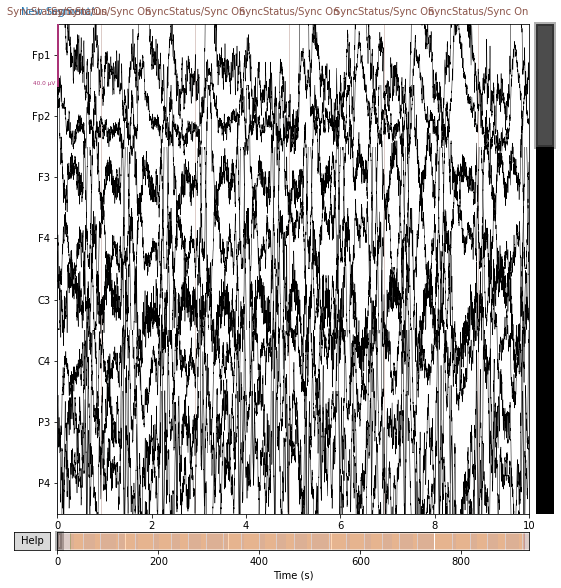

In [45]:
# Plot first 8 channels using mne plotting feature
pat1.plot(color='k', bad_color='r', n_channels=8)

# Plot just FP1 and FP2
# fig, ax = plt.subplots(2,1, figsize = (10,20))
# for i in range(2):
#     ax[i].plot(times, data[i])
#     ax[i].set_title('EEG Channel FP{}'.format(i+1))
#     ax[i].set_ylabel('Magnitude')
#     ax[i].set_xlabel('Time (s)')


In [58]:
# Read in tsv file to obtain sleep stage classification data
with open('sourcedata_sub-01-sleep-stage.tsv') as file:
    tsv_pat1 = csv.reader(file, delimiter='\t')    

    run_1_stages = []
    for line in tsv_pat1:
        if line[1] == 'task-sleep_run-1':
            run_1_stages.append(line[3])
        
print(run_1_stages) # sleep stage classification score for each epoch in sleep_run-1

# Next: Take DTFT of FP1 and/or FP2 channels, classify sleep stages by dominant frequency and compare to these classification scores

['2', '2', '1', '1', '1', '2', '1', '1', '1', '1', 'W', '1', '1', '1', '1', '1', 'W', 'W', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '1']


In [ ]:
# LPF at 30 or 40 Hz